In [2]:
def install(package):
    import importlib
    try:
        importlib.import_module(package)
        print(f"Das Paket {package} ist bereits installiert.")
    except ImportError:
        import pip
        try:
            pip.main(['install', package])
            print(f"Das Paket {package} wurde erfolgreich installiert.")
        except Exception as e:
            print(f"Ein Fehler ist aufgetreten während der Installation von {package}: {e}")
        

# Installieren Sie die Pakete, wenn sie nicht bereits installiert sind
install('tensorflow')
install('matplotlib')

Das Paket tensorflow ist bereits installiert.
Das Paket matplotlib ist bereits installiert.


In [3]:
# %pip install tensorflow
# %pip install matplotlib


In [1]:
# Importiere die notwendigen Bibliotheken
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
import matplotlib.pyplot as plt


In [3]:

# Lade den MNIST-Datensatz
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()


In [6]:

# Datenvorverarbeitung
X_train = X_train_raw / 255.0
X_test = X_test_raw / 255.0

y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)


In [8]:

# Erstelle das neuronale Netzwerkmodell
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompiliere das Modell
# model.compile(optimizer=optimizers.Adam(),
#               loss=losses.CategoricalCrossentropy(),
#               metrics=[metrics.CategoricalAccuracy()])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Trainiere das Modell
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8575 - loss: 0.4742 - val_accuracy: 0.9538 - val_loss: 0.1568
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9638 - loss: 0.1212 - val_accuracy: 0.9657 - val_loss: 0.1125
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0744 - val_accuracy: 0.9702 - val_loss: 0.1001
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9826 - loss: 0.0534 - val_accuracy: 0.9724 - val_loss: 0.0915
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9887 - loss: 0.0389 - val_accuracy: 0.9721 - val_loss: 0.0974
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9886 - loss: 0.0336 - val_accuracy: 0.9739 - val_loss: 0.1038
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9911 - loss: 0.0271 - val_accuracy: 0.9738 - val_loss: 0.1126
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9929 - loss: 0.0213 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.9727 - loss: 0.1183
Testgenauigkeit: 0.9762


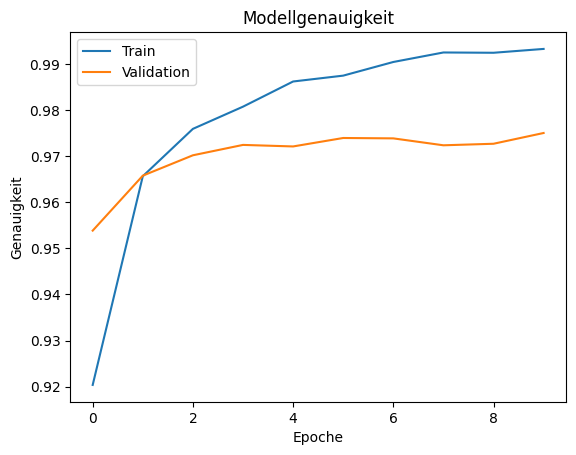

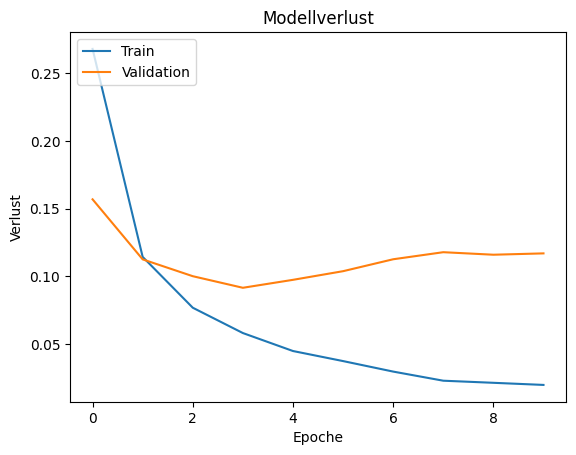

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step


In [9]:

# Bewerte das Modell
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Testgenauigkeit: {test_acc:.4f}")

# Speichere das Modell
model.save('mnist_zahlerkenner.keras')

# Zeichne Trainings- und Validierungsgenauigkeit
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modellgenauigkeit')
plt.ylabel('Genauigkeit')
plt.xlabel('Epoche')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Zeichne Trainings- und Validierungsverlust
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modellverlust')
plt.ylabel('Verlust')
plt.xlabel('Epoche')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Mache Vorhersagen
predictions = model.predict(X_test)

# Funktion zur Darstellung der Ziffer und der vorhergesagten Beschriftung
def plot_digit_and_prediction(index):
    color_map = 'Greens' if y_test[index].argmax() == predictions[index].argmax() else 'Reds'
    plt.imshow(X_test[index], cmap=color_map)
    plt.title(f"Wahr: {y_test[index].argmax()}, Vorhergesagt: {predictions[index].argmax()}")
    plt.show()


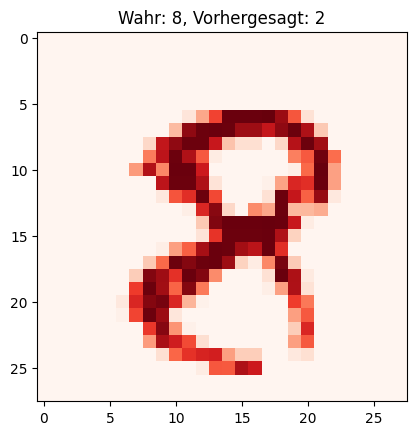

In [185]:

# Zeige ein Beispiel einer Tuffälligen Ziffer und Vorhersage
import random
index = random.randint(0, len(X_test))
plot_digit_and_prediction(index)
